<a href="https://colab.research.google.com/github/rondinell/Intelig-ncia-Artificial/blob/main/Possivellivro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-3862284313.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0152
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0017
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 9.4671e-04
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 8.5644e-04
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 8.1976e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 6.2628e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.9641e-04
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 5.2921e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4.9998e-04
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 4.3896e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


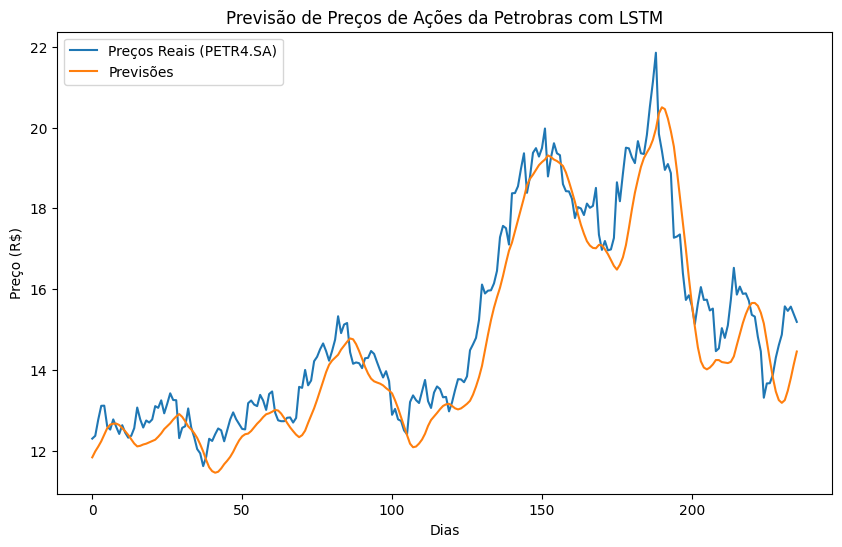

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# 1. Coleta de dados da Petrobras (PETR4.SA) via yfinance
ticker = 'PETR4.SA'  # Ação da Petrobras na B3
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
prices = data['Close'].values.reshape(-1, 1)  # Usar preços de fechamento

# 2. Pré-processamento: normalizar os dados entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# 3. Criar conjuntos de treino e teste
timesteps = 60  # Usar 60 dias para prever o próximo
X, y = [], []
for i in range(timesteps, len(scaled_prices)):
    X.append(scaled_prices[i-timesteps:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Formato [samples, timesteps, features]

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 4. Construir o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(timesteps, 1)))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# 6. Fazer previsões
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverter normalização
y_test = scaler.inverse_transform([y_test])

# 7. Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.T, label='Preços Reais (PETR4.SA)')
plt.plot(predictions, label='Previsões')
plt.title('Previsão de Preços de Ações da Petrobras com LSTM')
plt.xlabel('Dias')
plt.ylabel('Preço (R$)')
plt.legend()
plt.show()